# 1-dimensional linear regression

Your mission, should you accept it, is to unveil the `secret_numbers`.

These numbers have been used to generate samples `x` and labels `y` via the model:

$$
y = w_{\star}\cdot x + b_{\star}.
$$

Use linear regression with gradient descent to recover them.

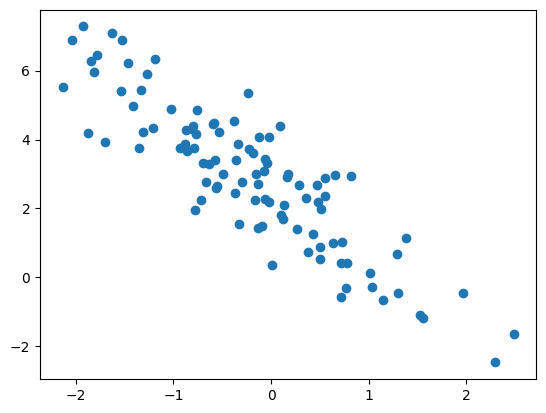

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

N = 100

np.random.seed(9819)

# create some "secret" parameters w and b that we wish to learn
secret_numbers = np.round(100*(1.5*np.random.rand(2)-1)/2)/10
w_star = secret_numbers[0]
b_star = secret_numbers[1]

# don't print them! :)
# print((w,b))

x = np.random.randn(N)
eps = np.random.randn(N)
y = w_star*x + b_star + eps

plt.scatter(x,y)

In [ ]:
# DELETE THIS in the student version

not_converged = True
i = 7000
while not_converged:
    np.random.seed(i)

    # create some "secret" parameters w and b that we wish to learn
    secret_numbers = np.round(100*(1.5*np.random.rand(2)-1)/2)/10
    w = secret_numbers[0]
    b = secret_numbers[1]

    # print((w,b))
    if (w,b) == (-2.0,2.4):
        not_converged = False
    else:
        i += 1

i

9819

# Functions for plotting

In [ ]:

# Function to plot the surface of J(w, b)
def plot_J_surface(x, y,alpha=1.0):
    # Create a grid of w and b values
    w_values = np.linspace(-6, 1, 100)
    b_values = np.linspace(-1, 6, 100)
    W, B = np.meshgrid(w_values, b_values)

    Z = np.array([[J(w, b) for w in w_values] for b in b_values])

    fig = go.Figure(data=[go.Surface(z=Z, x=w_values, y=b_values,opacity=alpha)])

    fig.update_layout(title='J(w, b) surface plot',
                      scene=dict(xaxis_title='w',
                                 yaxis_title='b',
                                 zaxis_title='MSE') ,
                      width=800, height=600)

    return fig

def plot_line_segment(fig, w1, b1, w2, b2, color='blue'):
    mse1 = J(w1, b1)
    mse2 = J(w2, b2)

    fig.add_trace(go.Scatter3d(x=[w1, w2], y=[b1, b2], z=[mse1, mse2],
                               mode='lines',
                               line=dict(color=color, width=2),
                               name=f'Line Segment ({w1}, {b1}) -> ({w2}, {b2})'))


def plot_point(fig, w, b, color='red'):
    mse = J(w, b)
    fig.add_trace(go.Scatter3d(x=[w], y=[b], z=[mse],
                               mode='markers',
                               marker=dict(size=5, color=color),
                               name=f'Point (w={w}, b={b})'))


# Make a "bad" guess what is $w$ and $b$


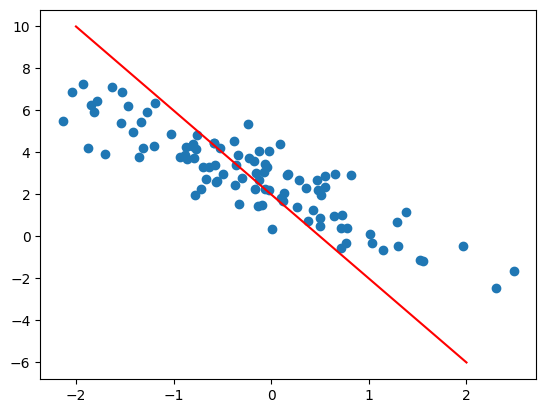

In [ ]:
w0 = -4.0
b0 = 2.0


x_grid = np.linspace(-2,2)
plt.plot(x_grid, w0*x_grid + b0, color ='r')
plt.scatter(x,y)

# Exercise 1.a

Implement the training means squared error.

In [ ]:

def J(w, b):
    pass
    # return mse

# delete this in the student version
def J(w, b):
    predictions = w * x + b
    mse = (1/N)*np.sum((y - predictions) ** 2)
    return mse

# Exercise 1.b

Implement the partial derivative of `J` w.r.t `w` and `b`

In [ ]:
def dJdw(w, b):
    pass
    # return grad_w

def dJdw(w, b):
    N = len(y)
    grad_w = -2 * np.mean(x * (y - (w * x + b)))
    return grad_w

def dJdb(w, b):
    pass
    # return grad_b

def dJdb(w, b):
    N = len(y)
    grad_b = -2 * np.mean(y - (w * x + b))
    return grad_b


# Exercise 1.c
Implement the gradient descent algorithm with constant step size = 1/4

In [ ]:
step_size=(1/4)
w,b = w0,b0


# gradient descent algorithm goes here

# change this to the actual update
w1 = None
b1 = None

# delete these
grad_w = dJdw(w, b)
grad_b = dJdb(w, b)

w1 = w - step_size * grad_w
b1 = b - step_size * grad_b



# Visualizing your solution to Exercise 1.c

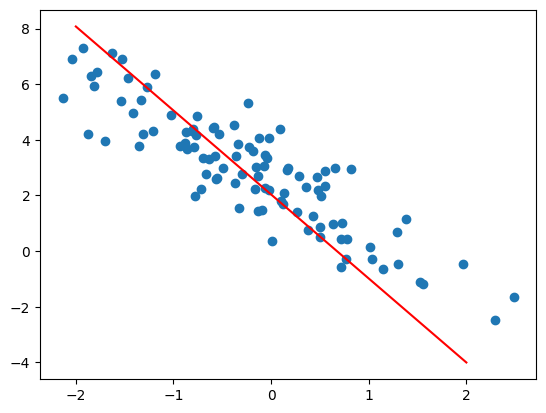

In [ ]:
plt.plot(x_grid, w1*x_grid + b1, color ='r')
plt.scatter(x,y)

In [ ]:
fig = plot_J_surface(x, y,alpha=0.5)

plot_point(fig, w0, b0,color='red')
plot_point(fig, w1, b1,color='blue')

plot_line_segment(fig, w0, b0, w1, b1, color='black')

fig.update_layout(showlegend=False)

fig.show()

# Exercise 1.d
Run your solution from exercise 1.c for 10 iterations with constant step size = 1/4

In [ ]:
w_list = [w0] # list of the w's
b_list = [b0] # list of the b's

num_steps = 100
step_size = (1/4)

for t in range(num_steps):
    pass

# inspect the last
# delete these
for t in range(num_steps):
    w,b = w_list[-1], b_list[-1] # get the last w and b


    grad_w = dJdw(w, b)
    grad_b = dJdb(w, b)

    w_next = w - step_size * grad_w
    b_next = b - step_size * grad_b

    w_list.append(w_next)
    b_list.append(b_next)


print("final iterate:", w_list[-1], b_list[-1])
print("secret numbers:", w_star, b_star)

final iterate: -1.8954751132978058 2.5152744178545725
secret numbers: -2.0 2.4


# Visualizing your solution to Exercise 1.c

In [ ]:
fig = plot_J_surface(x, y,alpha=.5)

def generate_color_spectrum(n):
    cmap = plt.get_cmap('hot')
    colors = [cmap(i / n) for i in range(n)]
    return colors
colors = generate_color_spectrum(len(w_list))

for i in range(len(w_list) - 1):
    plot_point(fig, w_list[i], b_list[i], color=colors[i])
    plot_line_segment(fig, w_list[i], b_list[i], w_list[i + 1], b_list[i + 1], color=colors[i])

plot_point(fig, w_list[-1], b_list[-1], color=colors[-1])


fig.update_layout(showlegend=False)

fig.show()